# Lasso ($L_1$), Ridge($L_2$) & Elastic Net Regression 
### Overview of this notebook
How do you tackle a high number of features when you are trying do regression? Well, there are a number of options which involves dimention reduction before doing regression. However, there are a number of other various regressions apart from our old friend Linear Regression. Ridge and Lasso regression are both useful techniques when facing datasets with *high dimentionality*. They are able to create parsimonious models via penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations, aka *Regularization*. 

1. [Ridge Regression (L2 regularization)](#t1.0):
    * adds penalty equilavent to square of the magnitude of coefficients
    * minimization objective = least square objective + $a$*(sum of square of coefficients) 
2. [Lasso Regression (L1 regularization)](#t2.0):
    * adds penalty equivalent to absolute value of magnitude of coefficients
    * minimization objective = least square objective + |$a$|
3. [Elasticnet Regression](#t3.0)

This self learning notebook drew a great deal of inspiration and guidance from [Analytics Vidhya's piece](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/) and various other sources

### Simulation time
Lets dive deeper into model complexity on magnitude of coeffecients. Below is a simulation of a sine curve (between 60 and 300 degrees) with some added random noise 

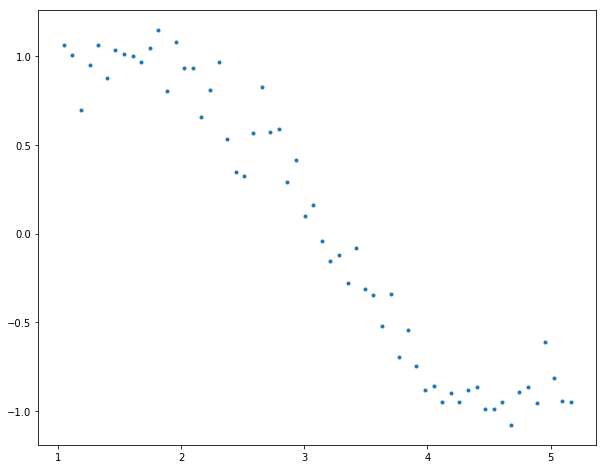

In [27]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,8

x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)
y = np.sin(x) + np.random.normal(0,0.15,len(x))  # random.normal bit is to add noise to data
data = pd.DataFrame(np.column_stack([x,y]), columns = ['x','y'])
plt.plot(data['x'], data['y'],'.')

#### Estimate the Sine curve with polynomial regression

In [28]:
for i in range(2,16): #theres no need for power of 1 as we already have it
    colname = 'x_%d'%i # new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


Writing a function to fit polynomial regression to our sine wave, as well as plotting the fit and recording all residual sum or squares and coefficients

In [34]:
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, models_to_plot):
    #initialize predictors:
    predictors = ['x']
    # if power = 3, then youll have column x, x_2, x_3
    if power >= 2:
        predictors.extend(['x_%d'%i for i in range(2, power+1)])

    #fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])

    #check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'],'.')
        plt.title('Plot for power: %d'%power)
        
    rss = sum((y_pred-data['y'])**2)
    ret=[rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

In [35]:
#Initialize a dataframe to store the results
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)
models_to_plot = {1:231, 3:232, 6:233, 9:234, 12:235, 15:236} #231 represents 2 rows, 3 columns and 1st plot

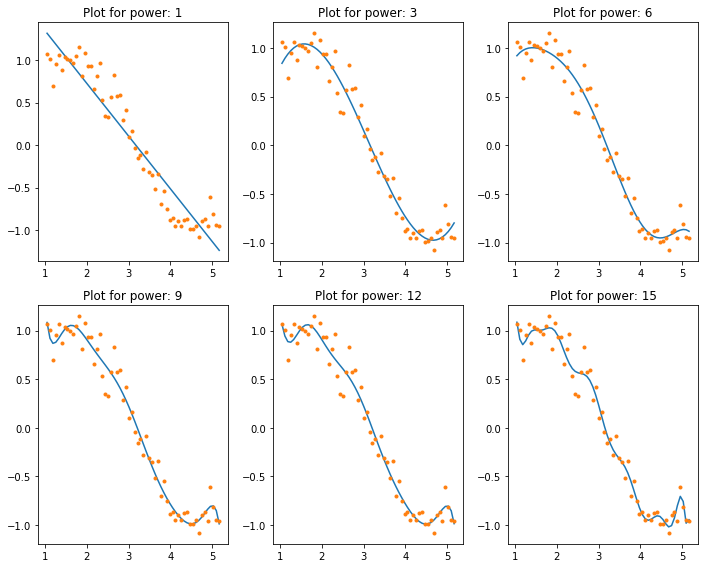

In [39]:
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [40]:
coef_matrix_simple

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,3.28032,1.96286,-0.619575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,3.27668,1.91406,-0.582551,-0.00595874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,1.10335,-1.0807,3.03157,-1.28553,0.137292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,1.07858,-0.265704,1.68692,-0.531752,-0.0356785,0.0139192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,1.01857,2.9915,-5.11776,4.72461,-1.92856,0.334735,-0.0206533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.990074,-2.80155,9.51665,-9.7132,5.22609,-1.55489,0.233099,-0.0136132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.928265,19.3021,-55.9523,68.9562,-44.6319,16.5148,-3.52814,0.40451,-0.0192269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.91761,43.1676,-137.013,183.825,-133.499,57.6767,-15.2527,2.41654,-0.210019,0.00767667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.874941,167.835,-614.513,963.403,-846.437,460.905,-161.849,36.7577,-5.2208,0.421902,-0.0148148,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.874578,137.717,-486.125,726.133,-595.881,293.256,-87.4563,14.5462,-0.806073,-0.138205,0.0262231,-0.00132096,NaN,NaN,NaN,NaN,NaN


If you pay attention to the coefficients, they get bigger as the model complexity increases. What does a large coefficient mean? It means that we are putting a lot of weight on it, in another words, more emphasis on it. Now, lets go into how Ridge, Lasso and Elastic net can help us solve our overfitting problem!


<a id="t1.0"></a>
## Ridge Regression
Think Ridge, think **$L_2$ Regularization**. It adds a factor of sum of squares of coefficients in the optimization objective
$$
Optimization Objective = RSS + \alpha\sum_{n=1}^N\theta_n^2$$
$$

$a$ is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients aka controls the strength of the penalty. You can think of ridge regression as adding a small amount of bias into how the new line will fit to the data. In other words, by starting with a slightly worse fit, Ridge regression can provide a better long term predictions. It reduces model complexity by coefficient shrinking
* $a$ = 0: the objective becomes the same as simple linear regression
* $a$ = infinite: the coefficients will be zero, because the inifinite weightage on square of coefficients

Ridge regression is a technique for analyzing multiple regression data that suffer from multicollinearity. Multicollinearity is bad news as it can create inaccurate estimates of the regression coefficients, inflate standard errors of the regression coefficients, give false p values/nonsignificant and degrade the predictability of the model 

In [41]:
# using all predictors
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True) # its Ridge now, with alpha as parameter
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

C:\Users\IanLim\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.502292e-17
  overwrite_a=True).T


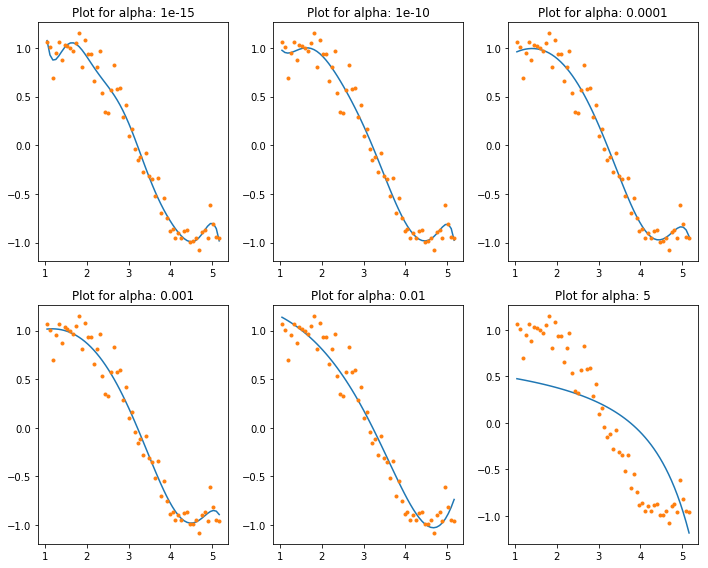

In [42]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

If you haven't noticed, as alpha increased, model complexity decreased. It is very obvious that extremely small values of alpha couldn't fix the overfitting issue. Significant values of alpha on the other hand did cause underfitting.

In [43]:
coef_matrix_ridge

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.873101,94.1711,-297.368,375.883,-232.891,64.5997,0.570473,-4.26844,0.39126,0.198699,-0.0279203,-0.00694042,0.00120344,0.000190282,-5.59143e-05,4.12609e-06,-7.79184e-08
alpha_1e-10,0.922601,11.1701,-28.9629,31.0694,-15.2353,2.89182,0.169365,-0.091002,-0.0108383,0.00198378,0.000636971,2.40846e-05,-2.00113e-05,-4.20369e-06,2.19353e-07,2.2729e-07,-2.33741e-08
alpha_1e-08,0.949292,1.33999,-1.53065,1.74946,-0.680458,0.038843,0.0158179,0.00015918,-0.00035954,-5.37182e-05,-2.91013e-07,1.08091e-06,1.89389e-07,1.96191e-08,3.92864e-09,8.19001e-10,-4.62722e-10
alpha_0.0001,0.962018,0.56132,0.546549,-0.128142,-0.025713,-0.00282024,-0.000110299,4.0575e-05,1.52075e-05,3.65239e-06,7.36585e-07,1.30351e-07,1.9445e-08,1.93533e-09,-1.30259e-10,-1.54943e-10,-6.17707e-11
alpha_0.001,1.00178,0.817638,0.305147,-0.0866873,-0.0204755,-0.00283643,-0.000219199,1.81203e-05,1.2399e-05,3.42971e-06,7.28224e-07,1.29346e-07,1.86865e-08,1.70622e-09,-1.5108e-10,-1.40448e-10,-5.16034e-11
alpha_0.01,1.43579,1.29889,-0.0883959,-0.0515001,-0.010099,-0.00141244,-0.000131521,7.23082e-07,4.13617e-06,1.30478e-06,2.96417e-07,5.6157e-08,8.97185e-09,1.09406e-09,4.29249e-11,-3.14226e-11,-1.48705e-11
alpha_1,5.64874,0.968886,-0.139008,-0.019268,-0.00300434,-0.000465519,-6.97006e-05,-9.90064e-06,-1.29236e-06,-1.42846e-07,-9.33025e-09,1.30688e-09,7.8035e-10,2.40231e-10,6.15627e-11,1.44581e-11,3.22713e-12
alpha_5,13.8383,0.54826,-0.0588687,-0.00852167,-0.00141945,-0.000241004,-4.08318e-05,-6.87431e-06,-1.14898e-06,-1.90534e-07,-3.13146e-08,-5.09188e-09,-8.16953e-10,-1.28804e-10,-1.98296e-11,-2.95006e-12,-4.16233e-13
alpha_10,18.0248,0.400342,-0.0372364,-0.00552679,-0.000949634,-0.000167292,-2.95811e-05,-5.23032e-06,-9.24527e-07,-1.63445e-07,-2.89111e-08,-5.11838e-09,-9.07113e-10,-1.60954e-10,-2.85942e-11,-5.08624e-12,-9.05846e-13
alpha_20,22.7205,0.276703,-0.0224693,-0.00340492,-0.000599344,-0.000108458,-1.9744e-05,-3.60077e-06,-6.57576e-07,-1.2028e-07,-2.20428e-08,-4.04814e-09,-7.45085e-10,-1.37447e-10,-2.54123e-11,-4.70877e-12,-8.7438e-13


Key points to note:
* RSS increases with increase in alpha, as the overfitting issue is being alleviated, underfitting is creeping in.
* Compare the first row of the ridge table to the last row of the linear regression. 
* Examine how the values decreased of the coefficients decreased dramatically. Note, we are using all features created (to the power of 15) in this ridge example.

See how none of the coefficients are zero? The coefficients are very very small but never *ZERO*. It still includes all features fed into Ridge regression. The major advantage of Ridge is that it shrinks coefficients and reduces model complexity.

In [44]:
coef_matrix_ridge.apply(lambda x: sum(x.values == 0), axis = 1)

alpha_1e-15     0
alpha_1e-10     0
alpha_1e-08     0
alpha_0.0001    0
alpha_0.001     0
alpha_0.01      0
alpha_1         0
alpha_5         0
alpha_10        0
alpha_20        0
dtype: int64

<a id="t2.0"></a>
## Lasso Regression
Think Lasso, think $L_1$ **Regularization**. Lasso is an abbreviation for *Least Absolute Shrinkage and Selection Operator*. It adds a factor of sum of absolute value of coefficients in the optimization objective.
$$
Optimization Objective = RSS + \alpha\sum_{n=1}^N|\theta_n|
$$

$a$ is also the parameter that provides a trade-off between balancing RSS and magnitude of coefficients. Conceptually, it works very similar to Ridge but the results can differ surprisingly. Lasso regression tend to favour sparse models where possible, which means it preferentially sets model coefficients to exactly zero!.

[Shi Yan](https://medium.com/mlreview/l1-norm-regularization-and-sparsity-explained-for-dummies-5b0e4be3938a) wrote a great piece on medium to explain $L_1$ regularization


In [45]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5) #max_iter = max iterations to run the model if it doesnt converge
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

C:\Users\IanLim\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


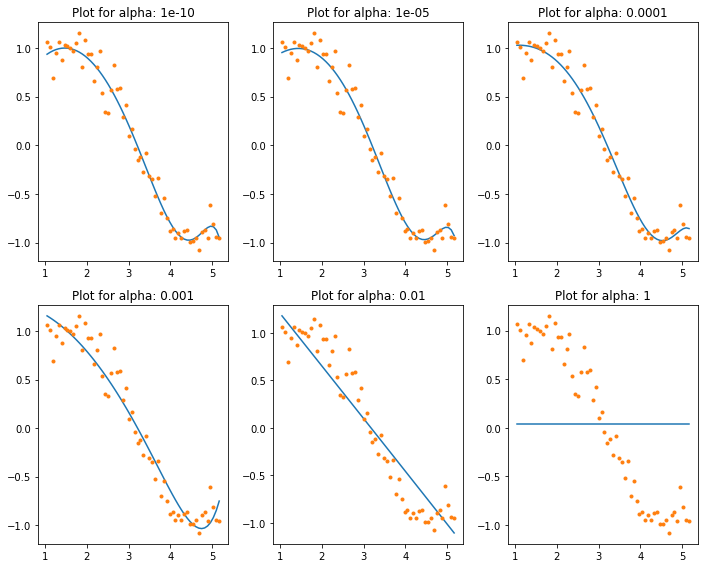

In [46]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

The model complexity again, decreases as we increase the value for alpha. 

In [47]:
coef_matrix_lasso

,rss,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.956715,0.222238,1.06464,-0.369048,0.000885176,0.00163313,-0.000118539,-6.43874e-05,-6.27554e-06,1.44874e-06,7.82079e-07,2.0758e-07,3.98135e-08,5.35996e-09,1.81973e-10,-1.9545e-10,-9.23654e-11
alpha_1e-10,0.956715,0.222239,1.06463,-0.369044,0.000884005,0.00163297,-0.000118453,-6.43884e-05,-6.27604e-06,1.44856e-06,7.82087e-07,2.07577e-07,3.98123e-08,5.35972e-09,1.82126e-10,-1.95439e-10,-9.23689e-11
alpha_1e-08,0.956708,0.222374,1.06416,-0.368607,0.000768994,0.00161624,-0.000109896,-6.44771e-05,-6.32441e-06,1.43063e-06,7.83012e-07,2.07335e-07,3.96964e-08,5.33557e-09,1.96e-10,-1.94185e-10,-9.2727e-11
alpha_1e-05,0.961296,0.50422,0.604311,-0.12811,-0.0382162,-0,0,0,0,7.72717e-06,1.00329e-06,7.72549e-08,0,0,0,-0,-6.95047e-11
alpha_0.0001,1.03263,0.903041,0.1711,-0,-0.0477801,-0,-0,0,0,9.46534e-06,5.09953e-07,0,0,0,-0,-0,-4.40439e-11
alpha_0.001,1.67883,1.29462,-0,-0.126087,-0,-0,-0,0,0,0,0,0,1.49606e-08,7.52631e-10,0,0,0
alpha_0.01,3.63907,1.75938,-0.552066,-0.000562323,-0,-0,-0,-0,-0,-0,-0,0,0,0,0,0,0
alpha_1,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,36.948,0.038032,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


* for the same alpha values, Lasso's RSS appears to be higher than that of Ridge's.
* The level of sparsity in evident for Lasso, as can be seen by the zero values<br>

Sparsity = The phenomenon of most of the coefficients being zero

In [48]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0), axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

### Summary
* **Ridge**: includes all of the features in the model. Its key strenght is shrinking coefficients and reducing model complexity
* **Lasso**: apart from shrinkage, it also performs feature selection by reducing other coefficients to zero

#### Use cases
* **Ridge**: used to prevent overfitting as it 'adds bias' to the model. Since it doesn't do *feature selection* like Lasso, its not the best when you have crazy amount of features
* **Lasso**: Its sparse solution capability means you can use it when you have heaps and heaps and heappps of features. A sparse solution is awesome computational advantage

#### High Multicollinearity
* **Ridge**: Works well when theres high multicollinearity because the coefficients will be distributed among them depending on correlation so no prior removal of multicollinearity is required
* **Lasso**: Arbitrarily selects any one feature among the highly correlated ones and reduce the coefficients of the rest to zero. Also the chosen variable changes randomly with change in model parameters, which...could pose as a problem

<a id="t3.0"></a>
## Elasticnet

Elastic Net came about due to the critique on Lasso being too dependent on data and thus unstable. The solution you ask? Combine the penalties of ridge($L_2$) and lasso($L_1$) to get the best of both worlds. It aims at minimizing the following loss function:

$$
Optimization Objective = RSS + \lambda((1-\alpha)/2\sum_{n=1}^N\theta_n^2 + \alpha\sum_{n=1}^N|\theta_n|)
$$

$a$ is a mixing parameter between ridge and lasso.

If your linear model contains many predictor variables or if these variables are correlated, the standard OLS parameter estimates have large variance, thus making the model unreliable. Regularization would be your go to :)